## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import seaborn as sns

## Concatinating 12 Data Sets in to one Data Frame

In [2]:
df1 = pd.read_csv('taxi_202201.csv')
df2 = pd.read_csv('taxi_202202.csv')
df3 = pd.read_csv('taxi_202203.csv')
df4 = pd.read_csv('taxi_202204.csv')
df5 = pd.read_csv('taxi_202205.csv')
df6 = pd.read_csv('taxi_202206.csv')
df7 = pd.read_csv('taxi_202207.csv')
df8 = pd.read_csv('taxi_202208.csv')
df9 = pd.read_csv('taxi_202209.csv')
df10 = pd.read_csv('taxi_202210.csv')
df11 = pd.read_csv('taxi_202211.csv')
df12 = pd.read_csv('taxi_202212.csv')

df_concat = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]) 

In [3]:
df_concat.shape

(2906989, 27)

In [4]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2906989 entries, 0 to 228472
Data columns (total 27 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   OBJECTID                int64  
 1   TRIPTYPE                object 
 2   PROVIDERNAME            float64
 3   FAREAMOUNT              float64
 4   GRATUITYAMOUNT          float64
 5   SURCHARGEAMOUNT         float64
 6   EXTRAFAREAMOUNT         float64
 7   TOLLAMOUNT              float64
 8   TOTALAMOUNT             float64
 9   PAYMENTTYPE             int64  
 10  ORIGINCITY              object 
 11  ORIGINSTATE             object 
 12  ORIGINZIP               object 
 13  DESTINATIONCITY         object 
 14  DESTINATIONSTATE        object 
 15  DESTINATIONZIP          object 
 16  MILEAGE                 float64
 17  DURATION                float64
 18  ORIGIN_BLOCK_LATITUDE   float64
 19  ORIGIN_BLOCK_LONGITUDE  float64
 20  ORIGIN_BLOCKNAME        object 
 21  DESTINATION_BLOCK_LAT   float64


## Checking Null Values

In [5]:
df_concat.isnull().sum()

OBJECTID                        0
TRIPTYPE                        0
PROVIDERNAME              2906989
FAREAMOUNT                 156559
GRATUITYAMOUNT             156559
SURCHARGEAMOUNT            156559
EXTRAFAREAMOUNT            156559
TOLLAMOUNT                 156559
TOTALAMOUNT                     2
PAYMENTTYPE                     0
ORIGINCITY                      0
ORIGINSTATE                  4855
ORIGINZIP                       0
DESTINATIONCITY                 0
DESTINATIONSTATE             5117
DESTINATIONZIP                  0
MILEAGE                         0
DURATION                       68
ORIGIN_BLOCK_LATITUDE      455405
ORIGIN_BLOCK_LONGITUDE     455405
ORIGIN_BLOCKNAME           455405
DESTINATION_BLOCK_LAT      652454
DESTINATION_BLOCK_LONG     652454
DESTINATION_BLOCKNAME      652454
AIRPORT                   2327694
ORIGINDATETIME_TR               0
DESTINATIONDATETIME_TR          0
dtype: int64

## Dropping PROVIDERNAME and AIRPORT columns which has most of the Nan values

In [6]:
df_concat = df_concat.drop(['PROVIDERNAME','AIRPORT'], axis=1)

In [7]:
df_concat.isnull().sum()

OBJECTID                       0
TRIPTYPE                       0
FAREAMOUNT                156559
GRATUITYAMOUNT            156559
SURCHARGEAMOUNT           156559
EXTRAFAREAMOUNT           156559
TOLLAMOUNT                156559
TOTALAMOUNT                    2
PAYMENTTYPE                    0
ORIGINCITY                     0
ORIGINSTATE                 4855
ORIGINZIP                      0
DESTINATIONCITY                0
DESTINATIONSTATE            5117
DESTINATIONZIP                 0
MILEAGE                        0
DURATION                      68
ORIGIN_BLOCK_LATITUDE     455405
ORIGIN_BLOCK_LONGITUDE    455405
ORIGIN_BLOCKNAME          455405
DESTINATION_BLOCK_LAT     652454
DESTINATION_BLOCK_LONG    652454
DESTINATION_BLOCKNAME     652454
ORIGINDATETIME_TR              0
DESTINATIONDATETIME_TR         0
dtype: int64

## Checking data with most origin and destination cities

In [8]:
top_10= df_concat['ORIGINCITY'].value_counts(ascending=False)
top_10.nlargest(30)

Washington          1939975
WASHINGTON           581893
Arlington            318652
NONE                  10243
-                      9634
UNKNOWN                4858
Washington, D.C.       3811
Alexandria             2879
 ARLINGTON             2373
Bethesda               1780
Silver Spring          1251
Sterling               1145
McLean                 1065
Hyattsville             974
Oxon Hill               944
 HYATTSVILLE            884
National Harbor         841
 SILVER SPRING          801
Capitol Heights         743
 CHEVY CHASE            741
District Heights        697
Chevy Chase             661
 CAPITOL HEIGHTS        623
Fort Myer               566
Arlington County        561
 ALEXANDRIA             545
Chillum                 531
 BETHESDA               513
 CHILLUM                420
Lanham                  407
Name: ORIGINCITY, dtype: int64

In [9]:
top_10_2= df_concat['DESTINATIONCITY'].value_counts(ascending=False)
top_10_2.nlargest(30)

Washington          1893233
WASHINGTON           505975
Arlington            191854
Alexandria            23090
 ARLINGTON            22866
Bethesda              19220
Floris                13428
Silver Spring         11353
National Harbor       11077
-                      8025
Chillum                7364
Oxon Hill              6909
Sterling               6854
Hyattsville            5801
Arlington County       5539
Chevy Chase            5486
UNKNOWN                5118
NONE                   5096
 HYATTSVILLE           4912
 SILVER SPRING         4691
 ALEXANDRIA            4284
Potomac                3648
Takoma Park            3606
Washington, D.C.       3563
 OXON HILL             3536
Rockville              3333
Mclean                 3148
 DULLES                3094
 CAPITOL HEIGHTS       2865
Falls Church           2613
Name: DESTINATIONCITY, dtype: int64

## Making sure the city name washington looks similar in all cells of Origincity column and Destinationcity column

In [10]:
df_concat['ORIGINCITY'] = df_concat['ORIGINCITY'].replace({'washington, d.c.':'washington'})
df_concat['ORIGINCITY'] = df_concat['ORIGINCITY'].apply(str.lower)

df_concat['DESTINATIONCITY'] = df_concat['DESTINATIONCITY'].replace({'washington, d.c.':'washington'})
df_concat['DESTINATIONCITY'] = df_concat['DESTINATIONCITY'].apply(str.lower)

## Slicing Data to set both origin and destination within Washington

In [11]:
df_final = df_concat[(df_concat['ORIGINCITY'] == 'washington') & (df_concat['DESTINATIONCITY'] == 'washington')]

## Droping columns which might not helpful for the model prediction

In [12]:
df_final = df_final.drop(['OBJECTID','TRIPTYPE','ORIGINCITY','DESTINATIONCITY','ORIGIN_BLOCKNAME','ORIGINSTATE','ORIGINZIP','DESTINATIONSTATE','DESTINATIONZIP','DESTINATION_BLOCKNAME','DESTINATIONZIP','DESTINATIONZIP'], axis=1)

## Considering, only rows containing latitude and longitude values without null values

In [13]:
df_final = df_final[df_final.ORIGIN_BLOCK_LATITUDE.notnull() & df_final.ORIGIN_BLOCK_LONGITUDE.notnull() & df_final.DESTINATION_BLOCK_LAT.notnull() & df_final.DESTINATION_BLOCK_LONG.notnull()]

## Final Data set shape

In [14]:
df_final.shape

(1896057, 15)

## Filling column average values for cells containing Nan Values

In [15]:
df_final['FAREAMOUNT'] = df_final['FAREAMOUNT'].fillna(df_final['FAREAMOUNT'].mean())
df_final['GRATUITYAMOUNT'] = df_final['GRATUITYAMOUNT'].fillna(df_final['GRATUITYAMOUNT'].mean())
df_final['SURCHARGEAMOUNT'] = df_final['SURCHARGEAMOUNT'].fillna(df_final['SURCHARGEAMOUNT'].mean())
df_final['EXTRAFAREAMOUNT'] = df_final['EXTRAFAREAMOUNT'].fillna(df_final['EXTRAFAREAMOUNT'].mean())
df_final['TOLLAMOUNT'] = df_final['TOLLAMOUNT'].fillna(df_final['TOLLAMOUNT'].mean())
df_final['TOTALAMOUNT'] = df_final['TOTALAMOUNT'].fillna(df_final['TOTALAMOUNT'].mean())

In [16]:
df_final

,FAREAMOUNT,GRATUITYAMOUNT,SURCHARGEAMOUNT,EXTRAFAREAMOUNT,TOLLAMOUNT,TOTALAMOUNT,PAYMENTTYPE,MILEAGE,DURATION,ORIGIN_BLOCK_LATITUDE,ORIGIN_BLOCK_LONGITUDE,DESTINATION_BLOCK_LAT,DESTINATION_BLOCK_LONG,ORIGINDATETIME_TR,DESTINATIONDATETIME_TR
1,8.65,3.10,0.00,0.25,0.0,12.00,1,1.53,90.0,38.896115,-76.990888,38.896116,-76.989277,01/01/2022 00:00,01/01/2022 00:00
4,12.78,0.00,0.25,0.00,0.0,16.61,4,2.85,975.0,38.899817,-77.026514,38.919941,-77.000047,01/01/2022 00:00,01/01/2022 00:00
8,12.97,0.00,0.25,0.00,0.0,13.22,2,3.56,820.0,38.896881,-77.006479,38.941507,-77.005127,01/01/2022 00:00,01/01/2022 00:00
10,7.03,0.00,0.25,0.00,0.0,7.28,2,1.28,412.0,38.916643,-77.031951,38.935117,-77.032733,01/01/2022 00:00,01/01/2022 00:00
11,5.68,0.00,0.25,2.25,0.0,11.10,1,1.17,416.0,38.896737,-77.028086,38.907175,-77.036530,01/01/2022 00:00,01/01/2022 00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228465,16.48,5.00,1.25,0.00,0.0,22.73,1,3.61,1570.0,38.897204,-77.008388,38.932935,-77.028086,12/31/2022 23:00,12/31/2022 23:00
228466,19.45,5.00,1.25,0.00,0.0,25.70,1,5.40,1696.0,38.896881,-77.006479,38.925439,-77.073188,12/31/2022 23:00,12/31/2022 23:00
228467,9.05,0.00,1.25,1.25,0.0,10.30,2,2.04,622.0,38.896881,-77.006479,38.898995,-76.976990,12/31/2022 23:00,12/31/2022 23:00
228469,13.78,0.00,1.25,0.00,0.0,15.03,2,2.91,1217.0,38.896881,-77.006479,38.899774,-77.054955,12/31/2022 23:00,12/31/2022 23:00


## Heatmap to visualize missing values

<AxesSubplot:>

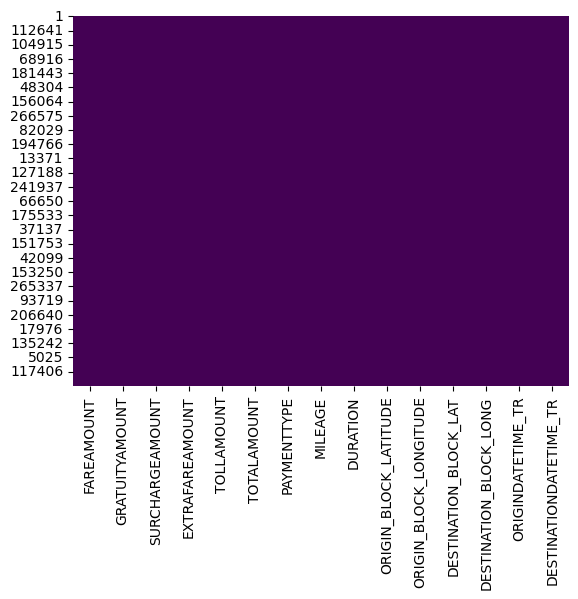

In [17]:
sns.heatmap(df_final.isnull(),cbar=False,cmap='viridis')